#### Question 4
### Is there any relationship between the food abundancy and economic wealth?
In this analysis, we will be analyzing the correlation between GDP per capita and food abundance. 

In [152]:
# Import pandas library
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st


In [153]:
df = pd.read_csv("./Resources/combined.csv")
df.head()

,Unnamed: 0,Country,Item,Element,Year,Unit,Value,Population Size,2020 GDP in USD,GDP Per Capita
0,0,Afghanistan,"Almonds, with shell",Production,2020,tonnes,39307.0,38928341.0,2.011614e+10,516.747871
1,1,Afghanistan,"Anise, badian, fennel, coriander",Production,2020,tonnes,18387.0,38928341.0,2.011614e+10,516.747871
2,2,Afghanistan,Apples,Production,2020,tonnes,270857.0,38928341.0,2.011614e+10,516.747871
3,3,Afghanistan,Apricots,Production,2020,tonnes,131788.0,38928341.0,2.011614e+10,516.747871
4,4,Afghanistan,Barley,Production,2020,tonnes,127757.0,38928341.0,2.011614e+10,516.747871


In [154]:
regions_df = pd.read_csv("./Resources/world-regions.csv")
regions_df = regions_df.rename(columns={"Entity": "Country", "World Region according to the World Bank":"Regions"})
regions_df.head()

,Country,Code,Year,Regions
0,Afghanistan,AFG,2017,South Asia
1,Albania,ALB,2017,Europe and Central Asia
2,Algeria,DZA,2017,Middle East and North Africa
3,American Samoa,ASM,2017,East Asia and Pacific
4,Andorra,AND,2017,Europe and Central Asia


In [155]:
del df['Unnamed: 0']
df.columns

Index(['Country', 'Item', 'Element', 'Year', 'Unit', 'Value',
       'Population Size', '2020 GDP in USD', 'GDP Per Capita'],
      dtype='object')

In [156]:
# Merge regions and country data sets
merged = pd.merge(df, regions_df[["Country", "Regions"]], on="Country")
merged

,Country,Item,Element,Year,Unit,Value,Population Size,2020 GDP in USD,GDP Per Capita,Regions
0,Afghanistan,"Almonds, with shell",Production,2020,tonnes,39307.0,38928341.0,2.011614e+10,516.747871,South Asia
1,Afghanistan,"Anise, badian, fennel, coriander",Production,2020,tonnes,18387.0,38928341.0,2.011614e+10,516.747871,South Asia
2,Afghanistan,Apples,Production,2020,tonnes,270857.0,38928341.0,2.011614e+10,516.747871,South Asia
3,Afghanistan,Apricots,Production,2020,tonnes,131788.0,38928341.0,2.011614e+10,516.747871,South Asia
4,Afghanistan,Barley,Production,2020,tonnes,127757.0,38928341.0,2.011614e+10,516.747871,South Asia
...,...,...,...,...,...,...,...,...,...,...
8551,Zimbabwe,Goats,Stocks,2020,Head,4773505.0,14862927.0,1.805117e+10,1214.509820,Sub-Saharan Africa
8552,Zimbabwe,Horses,Stocks,2020,Head,28284.0,14862927.0,1.805117e+10,1214.509820,Sub-Saharan Africa
8553,Zimbabwe,Mules,Stocks,2020,Head,1248.0,14862927.0,1.805117e+10,1214.509820,Sub-Saharan Africa
8554,Zimbabwe,Pigs,Stocks,2020,Head,272206.0,14862927.0,1.805117e+10,1214.509820,Sub-Saharan Africa


In [157]:
# Check missing data
merged.count()

Country            8556
Item               8556
Element            8556
Year               8556
Unit               8556
Value              8556
Population Size    8556
2020 GDP in USD    8439
GDP Per Capita     8439
Regions            8556
dtype: int64

In [158]:
# Drop Missing Values
no_missing = merged.dropna(how="any")
no_missing.count()

Country            8439
Item               8439
Element            8439
Year               8439
Unit               8439
Value              8439
Population Size    8439
2020 GDP in USD    8439
GDP Per Capita     8439
Regions            8439
dtype: int64

Food abundance can be defined as total amount of live stock and crop produced per country.

In [159]:
# Remove World from dataset
no_world = no_missing.loc[no_missing['Country']!= "World",:]

In [160]:
# Group by Country to find the sum of all the food per country
grp_df = no_world.groupby(["Country"])
tot_food_grp = grp_df["Value"].sum()
tot_food_df = pd.DataFrame({"Country": list(tot_food_grp.index), "Total Food Produced": list(tot_food_grp)})
tot_food_df.sort_values(by="Total Food Produced", ascending=True)

,Country,Total Food Produced
101,Nauru,1.142600e+04
88,Maldives,1.374000e+04
91,Marshall Islands,2.306200e+04
148,Tuvalu,7.378200e+04
129,Seychelles,1.341550e+05
...,...,...
112,Pakistan,1.804460e+09
65,India,2.472701e+09
20,Brazil,2.881277e+09
66,Indonesia,4.127112e+09


In [161]:
# The GDP Per Capita is calculated per country already. Therefore, we just need to find all it's values per country by taking the max
gdp_grp = grp_df[["GDP Per Capita", "Population Size"]].max()
gdp_df = pd.DataFrame({"Country":list(gdp_grp.index), "GDP Per Capita": list(gdp_grp['GDP Per Capita']), "Population Size":list(gdp_grp['Population Size'])})
gdp_df.sort_values("GDP Per Capita")

,Country,GDP Per Capita,Population Size
23,Burundi,233.837510,11890781.0
134,Somalia,438.255166,15893219.0
98,Mozambique,448.843891,31255435.0
85,Madagascar,477.613041,27691019.0
27,Central African Republic,481.746297,4829764.0
...,...,...,...
37,Denmark,61063.316430,5831404.0
110,Norway,67329.677791,5379475.0
68,Ireland,85422.542868,4985674.0
141,Switzerland,87100.414821,8636561.0


In [162]:
dup_merged = merged[["Country", "Regions"]].loc[merged[["Country", "Regions"]].duplicated()==False, :]
dup_merged


,Country,Regions
0,Afghanistan,South Asia
43,Albania,Europe and Central Asia
110,Algeria,Middle East and North Africa
183,Angola,Sub-Saharan Africa
222,Antigua and Barbuda,Latin America and Caribbean
...,...,...
8276,Uruguay,Latin America and Caribbean
8331,Uzbekistan,Europe and Central Asia
8412,Vanuatu,East Asia and Pacific
8427,Zambia,Sub-Saharan Africa


In [163]:
# Merge data into one
gdp_food = pd.merge(tot_food_df, gdp_df, on="Country")
gdp_food = pd.merge(gdp_food, dup_merged, on="Country")
gdp_food

,Country,Total Food Produced,GDP Per Capita,Population Size,Regions
0,Afghanistan,54771898.0,516.747871,38928341.0,South Asia
1,Albania,12904896.0,5332.160475,2837849.0,Europe and Central Asia
2,Algeria,201992285.0,3306.858208,43851043.0,Middle East and North Africa
3,Angola,84297733.0,1631.431691,32866268.0,Sub-Saharan Africa
4,Antigua and Barbuda,215545.0,13992.744480,97928.0,Latin America and Caribbean
...,...,...,...,...,...
152,Uruguay,65533304.0,15418.815309,3473727.0,Latin America and Caribbean
153,Uzbekistan,127834310.0,1749.655815,34232050.0,Europe and Central Asia
154,Vanuatu,1115324.0,2919.836800,307150.0,East Asia and Pacific
155,Zambia,62945959.0,985.132436,18383956.0,Sub-Saharan Africa


### Total Food Produced and GDP for all countries
Histogram of the data

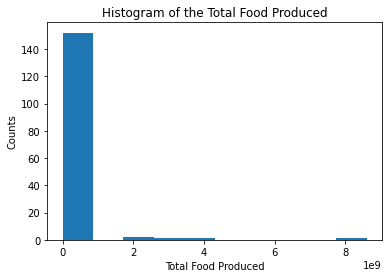

NormaltestResult(statistic=268.03537660810383, pvalue=6.264082835109123e-59)


In [164]:
# Total Food Histogram
plt.hist(gdp_food['Total Food Produced'])
plt.xlabel('Total Food Produced')
plt.ylabel('Counts')
plt.title("Histogram of the Total Food Produced")
plt.show()
print(st.normaltest(gdp_food["Total Food Produced"]))

Not normal

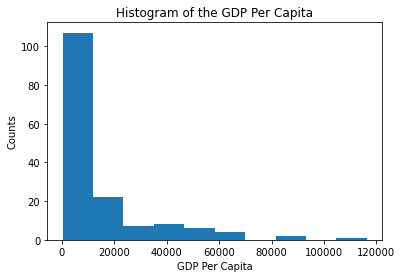

NormaltestResult(statistic=95.08074111646093, pvalue=2.2567289433758462e-21)


In [165]:
# GDP Per Capita Histogram
plt.hist(gdp_food['GDP Per Capita'])
plt.xlabel('GDP Per Capita')
plt.ylabel('Counts')
plt.title("Histogram of the GDP Per Capita")
plt.show()
print(st.normaltest(gdp_food["GDP Per Capita"]))

Not normal.

Boxplots

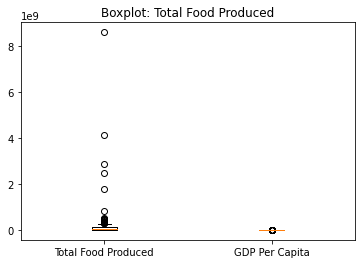

In [166]:
fig1, ax1 = plt.subplots()
ax1.set_title("Boxplot: Total Food Produced")
ax1.boxplot(gdp_food[["Total Food Produced", "GDP Per Capita"]])
ax1.set_xticklabels(["Total Food Produced", "GDP Per Capita"])
plt.show()

In [167]:
quartiles = gdp_food["Total Food Produced"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 8177737.0
The upper quartile is: 119752387.0
The interquartile range is: 111574650.0
The the median is: 37378424.0 
Values below -159184238.0 could be outliers.
Values above 287114362.0 could be outliers.


In [168]:
print("Top 10 Food Producing Countries and their GDP Per Capita:")
gdp_food.sort_values(by='Total Food Produced', ascending=False).head(10)

Top 10 Food Producing Countries and their GDP Per Capita:


,Country,Total Food Produced,GDP Per Capita,Population Size,Regions
30,China,8.615244e+09,10408.669756,1.411100e+09,East Asia and Pacific
66,Indonesia,4.127112e+09,3870.557620,2.735236e+08,East Asia and Pacific
20,Brazil,2.881277e+09,6814.875632,2.125594e+08,Latin America and Caribbean
65,India,2.472701e+09,1933.101069,1.380004e+09,South Asia
112,Pakistan,1.804460e+09,1359.514522,2.208923e+08,South Asia
94,Mexico,8.254478e+08,8431.665017,1.289328e+08,Latin America and Caribbean
11,Bangladesh,5.330869e+08,2270.347535,1.646894e+08,South Asia
99,Myanmar,4.943831e+08,1450.662673,5.440979e+07,East Asia and Pacific
143,Thailand,4.886396e+08,7158.766684,6.979998e+07,East Asia and Pacific
108,Nigeria,4.744781e+08,2097.092473,2.061396e+08,Sub-Saharan Africa


In [169]:
print("Top 10 GDP Per Capita Countries and their Food Production Amount:")
gdp_food.sort_values(by='GDP Per Capita', ascending=False).head(10)

Top 10 GDP Per Capita Countries and their Food Production Amount:


,Country,Total Food Produced,GDP Per Capita,Population Size,Regions
84,Luxembourg,480888.0,116356.158037,630419.0,Europe and Central Asia
141,Switzerland,19618140.0,87100.414821,8636561.0,Europe and Central Asia
68,Ireland,14595870.0,85422.542868,4985674.0,Europe and Central Asia
110,Norway,22331121.0,67329.677791,5379475.0,Europe and Central Asia
37,Denmark,30623790.0,61063.316430,5831404.0,Europe and Central Asia
131,Singapore,3938625.0,60729.450349,5685807.0,East Asia and Pacific
64,Iceland,809770.0,59264.034091,366463.0,Europe and Central Asia
103,Netherlands,139471330.0,52396.032210,17441500.0,Europe and Central Asia
140,Sweden,23908513.0,52300.206199,10353442.0,Europe and Central Asia
7,Australia,263620034.0,51680.316523,25693267.0,East Asia and Pacific


Is GDP Per Capita correlated to Total Amount of Food Produced?

In [170]:
x_values = gdp_food['Total Food Produced']
y_values = gdp_food['GDP Per Capita']


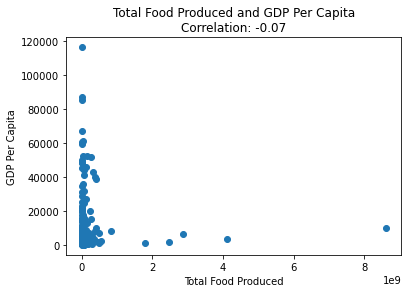

Correlation: -0.07


In [171]:
plt.scatter(x_values,y_values)
plt.xlabel("Total Food Produced")
plt.ylabel("GDP Per Capita")
plt.title("Total Food Produced and GDP Per Capita\nCorrelation: -0.07")
plt.savefig("./Question4-Images/food_gdp_correlation.png")
plt.show()
print(f"Correlation: {round(st.pearsonr(x_values,y_values)[0],2)}")

Develop a linear regression model on the data to predict GDP Per Capita based on Total Food Availability per Country.

x = Total amount of food produced in the country

y = GDP per Capita

The r-value is: 0.004482507133208534


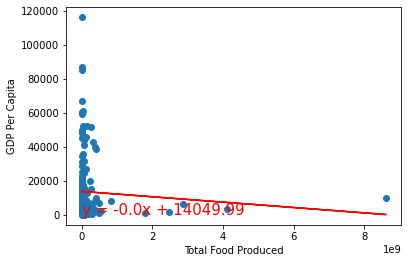

In [95]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values)+1,min(y_values)+1),fontsize=15,color="red")
plt.xlabel("Total Food Produced")
plt.ylabel("GDP Per Capita")
print(f"The r-value is: {rvalue**2}")
plt.show()

Regression Analysis by Live Stock vs. Crop

In [96]:
live_df = no_world.loc[no_world["Element"]=="Stocks", :]
crop_df = no_world.loc[no_world["Element"]=="Production", :]

In [97]:
# Group Elements
live_grp = live_df.groupby("Country")
crop_grp = crop_df.groupby("Country")

In [98]:
# Take sum of values
sum_live_grp = live_grp["Value"].sum()
live_df = pd.DataFrame({"Country":list(sum_live_grp.index), "Total Live Stock":list(sum_live_grp)})
live_df.reset_index()
live_df

,Country,Total Live Stock
0,Afghanistan,42292638.0
1,Albania,10112893.0
2,Algeria,177663901.0
3,Angola,63213788.0
4,Antigua and Barbuda,205722.0
...,...,...
150,Uruguay,58800714.0
151,Uzbekistan,98583248.0
152,Vanuatu,751300.0
153,Zambia,49141548.0


In [99]:
sum_crop_grp = crop_grp["Value"].sum()
crop_df = pd.DataFrame({"Country":list(sum_crop_grp.index), "Total Crops Produced":list(sum_crop_grp)})
crop_df.reset_index()
crop_df.sort_values(by="Total Crops Produced", ascending=False)

,Country,Total Crops Produced
30,China,1.816208e+09
65,India,1.101656e+09
20,Brazil,1.095737e+09
66,Indonesia,4.438164e+08
143,Thailand,1.751034e+08
...,...,...
88,Maldives,1.374000e+04
129,Seychelles,9.976000e+03
4,Antigua and Barbuda,9.823000e+03
101,Nauru,3.377000e+03


In [100]:
max(crop_df["Total Crops Produced"])

1816208323.0

In [101]:
max(df.loc[df["Element"]=="Production","Value"])

1869715086.0

## Total Food Produced and GDP for South Asia Region

Histogram

In [102]:
gdp_food["Regions"].unique()

array(['South Asia', 'Europe and Central Asia',
       'Middle East and North Africa', 'Sub-Saharan Africa',
       'Latin America and Caribbean', 'East Asia and Pacific',
       'North America'], dtype=object)

In [103]:
s_asia = gdp_food.loc[gdp_food["Regions"] == "South Asia"]
s_asia

,Country,Total Food Produced,GDP Per Capita,Population Size,Regions
0,Afghanistan,5.477190e+07,516.747871,3.892834e+07,South Asia
11,Bangladesh,5.330869e+08,2270.347535,1.646894e+08,South Asia
17,Bhutan,2.096207e+06,3000.777986,7.716120e+05,South Asia
65,India,2.472701e+09,1933.101069,1.380004e+09,South Asia
88,Maldives,1.374000e+04,6924.105745,5.405420e+05,South Asia
102,Nepal,1.353131e+08,1147.471971,2.913681e+07,South Asia
112,Pakistan,1.804460e+09,1359.514522,2.208923e+08,South Asia
137,Sri Lanka,3.737842e+07,3694.040948,2.191900e+07,South Asia


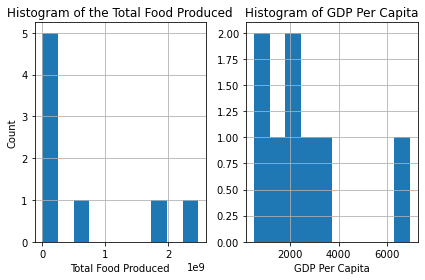

NormaltestResult(statistic=4.1166719614268725, pvalue=0.12766623231427585)
NormaltestResult(statistic=7.017255813736865, pvalue=0.029937963943313047)


c:\Users\krist\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [172]:
# Histogram
fig, ax = plt.subplots(1, 2)
s_asia.hist('Total Food Produced', ax=ax[0])
s_asia.hist("GDP Per Capita", ax=ax[1])
ax[0].set_title("Histogram of the Total Food Produced", wrap=True)
ax[1].set_title("Histogram of GDP Per Capita", wrap=True)
ax[0].set_xlabel("Total Food Produced")
ax[1].set_xlabel("GDP Per Capita")
ax[0].set_ylabel("Count")
fig.tight_layout()
plt.savefig("./Question4-Images/histogram_south_asia.png")
plt.show()
print(st.normaltest(s_asia["Total Food Produced"]))
print(st.normaltest(s_asia["GDP Per Capita"]))

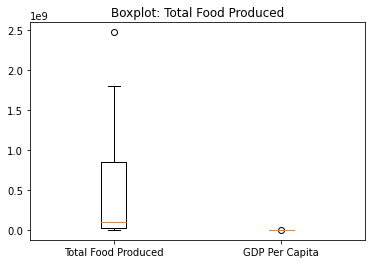

In [105]:
fig1, ax1 = plt.subplots()
ax1.set_title("Boxplot: Total Food Produced")
ax1.boxplot(s_asia[["Total Food Produced", "GDP Per Capita"]])
ax1.set_xticklabels(["Total Food Produced", "GDP Per Capita"])
plt.show()

In [106]:
x_values=s_asia["Total Food Produced"]
y_values=s_asia["GDP Per Capita"]


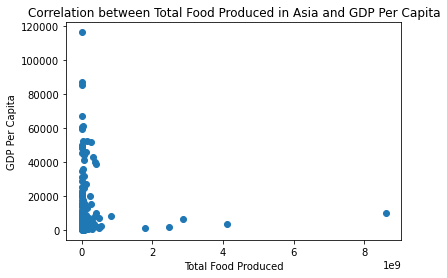

Correlation: -0.07


In [145]:
plt.scatter(x_values,y_values)
plt.xlabel("Total Food Produced")
plt.ylabel("GDP Per Capita")
plt.title("Correlation between Total Food Produced in Asia and GDP Per Capita", wrap=True)
plt.show()
print(f"Correlation: {round(st.pearsonr(x_values,y_values)[0],2)}")

Very weak negative correlation

The r-value is: 0.10228282183572704


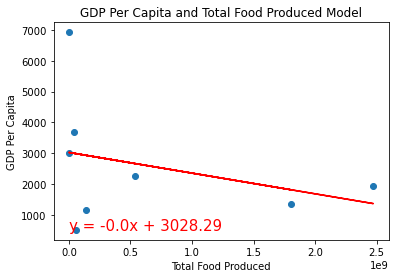

In [108]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values)+1,min(y_values)+1),fontsize=15,color="red")
plt.xlabel("Total Food Produced")
plt.ylabel("GDP Per Capita")
plt.title("GDP Per Capita and Total Food Produced Model")
print(f"The r-value is: {rvalue**2}")
plt.show()

### Top 40% of GDP Per Capita Countries - Focus on Economic Wealth

Not including the top 2%

In [109]:
top_40 = gdp_food.loc[(gdp_food["GDP Per Capita"] >= gdp_food["GDP Per Capita"].quantile(0.60)) & 
    (gdp_food["GDP Per Capita"]<gdp_food["GDP Per Capita"].quantile(0.98)), :]
top_40

,Country,Total Food Produced,GDP Per Capita,Population Size,Regions
4,Antigua and Barbuda,2.155450e+05,13992.744480,9.792800e+04,Latin America and Caribbean
5,Argentina,3.813241e+08,8585.694742,4.537676e+07,Latin America and Caribbean
7,Australia,2.636200e+08,51680.316523,2.569327e+07,East Asia and Pacific
8,Austria,1.548362e+07,48588.659385,8.916864e+06,Europe and Central Asia
10,Bahrain,1.004125e+07,20406.502326,1.701583e+06,Middle East and North Africa
12,Barbados,4.417133e+06,16318.748105,2.873710e+05,Latin America and Caribbean
14,Belgium,2.268623e+07,45189.366900,1.154424e+07,Europe and Central Asia
21,Bulgaria,1.442610e+07,10079.203381,6.934015e+06,Europe and Central Asia
26,Canada,3.093858e+08,43258.263872,3.803720e+07,North America
29,Chile,1.379559e+08,13220.570758,1.911621e+07,Latin America and Caribbean


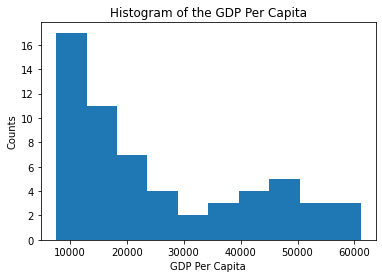

NormaltestResult(statistic=8.36420507483937, pvalue=0.015266375673192422)


In [110]:
plt.hist(top_40['GDP Per Capita'])
plt.xlabel('GDP Per Capita')
plt.ylabel('Counts')
plt.title("Histogram of the GDP Per Capita")
plt.show()
print(st.normaltest(top_40["GDP Per Capita"]))

In [111]:
x_values = top_40["Total Food Produced"]
y_values = top_40["GDP Per Capita"]

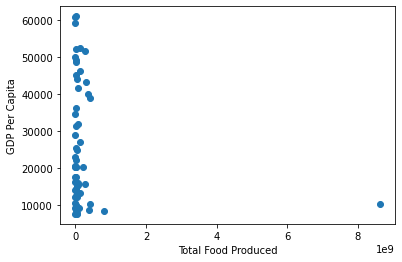

Correlation: -0.13


In [112]:
plt.scatter(x_values,y_values)
plt.xlabel("Total Food Produced")
plt.ylabel("GDP Per Capita")
plt.show()
print(f"Correlation: {round(st.pearsonr(x_values,y_values)[0],2)}")

## Human Development Index
Those with score of 0.8 or higher is considered a First World Country
- Low human development (0-.55)
- Medium human development (.55-.70)
- High human development (.70-80)
- Very high human development (.80-1.0)

In [113]:
hdi_df = pd.read_csv("./Resources/hdi.csv")
hdi_df.head()

,Country,Country Code,HDI
0,Afghanistan,AFG,0.511
1,Angola,AGO,0.581
2,Albania,ALB,0.795
3,Andorra,AND,0.868
4,United Arab Emirates,ARE,0.890


In [114]:
# Merge with food and gdp data
merge_hdi = pd.merge(gdp_food, hdi_df[["Country", "HDI"]], on="Country")

In [115]:
merge_hdi.head()

,Country,Total Food Produced,GDP Per Capita,Population Size,Regions,HDI
0,Afghanistan,54771898.0,516.747871,38928341.0,South Asia,0.511
1,Albania,12904896.0,5332.160475,2837849.0,Europe and Central Asia,0.795
2,Algeria,201992285.0,3306.858208,43851043.0,Middle East and North Africa,0.748
3,Angola,84297733.0,1631.431691,32866268.0,Sub-Saharan Africa,0.581
4,Antigua and Barbuda,215545.0,13992.744480,97928.0,Latin America and Caribbean,0.778


### Correlation Analysis for Total Food Produced and HDI

In [116]:
x_values = merge_hdi['Total Food Produced']
y_values = merge_hdi['HDI']

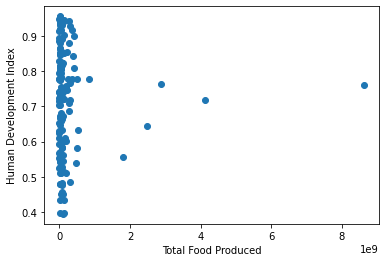

Correlation: -0.0


In [117]:
plt.scatter(x_values,y_values)
plt.xlabel("Total Food Produced")
plt.ylabel("Human Development Index")
plt.show()
print(f"Correlation: {round(st.pearsonr(x_values,y_values)[0],2)}")

No correlation between HDI and Food Produced

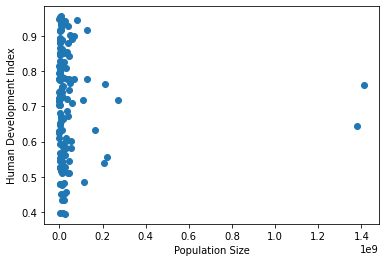

Correlation: -0.04


In [118]:
x_values=merge_hdi['Population Size']
y_values = merge_hdi['HDI']
plt.scatter(x_values, y_values)
plt.xlabel("Population Size")
plt.ylabel("Human Development Index")
plt.show()
print(f"Correlation: {round(st.pearsonr(x_values,y_values)[0],2)}")

In [119]:
# Look within first 95% quantile
top_95 = merge_hdi.loc[merge_hdi['Population Size']<merge_hdi['Population Size'].quantile(0.95), :]

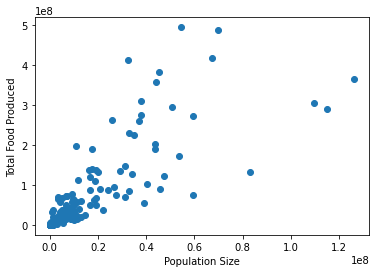

Correlation: 0.78


In [120]:
x_values=top_95['Population Size']
y_values=top_95['Total Food Produced']
plt.scatter(x_values, y_values)
plt.xlabel("Population Size")
plt.ylabel("Total Food Produced")
plt.show()
print(f"Correlation: {round(st.pearsonr(x_values,y_values)[0],2)}")

### Correlation Analysis with GDP Per Capita and HDI
Should be correlated

In [121]:
x_values = merge_hdi['GDP Per Capita']
y_values = merge_hdi['HDI']

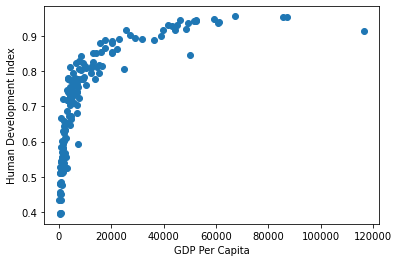

Correlation: 0.7


In [122]:
plt.scatter(x_values,y_values)
plt.xlabel("GDP Per Capita")
plt.ylabel("Human Development Index")
plt.show()
print(f"Correlation: {round(st.pearsonr(x_values,y_values)[0],2)}")

Strong Correlation; graph looks like it is exponential. At some point in gdp, the HDI index starts to level slow down in it's rate of increase.

#### Group Data by the 4 levels of HDI
- Low human development (0-.55)
- Medium human development (.55-.70)
- High human development (.70-80)
- Very high human development (.80-1.0)

In [123]:
low_hdi = merge_hdi.loc[merge_hdi['HDI']<= 0.55, :]
med_hdi = merge_hdi.loc[(merge_hdi['HDI']>0.55)&(merge_hdi['HDI']<=0.7), :]
high_hdi = merge_hdi.loc[(merge_hdi['HDI']>0.7)&(merge_hdi['HDI']<=0.8), :]
very_high_hdi = merge_hdi.loc[(merge_hdi['HDI']>0.8), :]

In [124]:
print(f"Low:\n{low_hdi.max()}")
print(f"\nMedium:\n{med_hdi.max()}")
print(f"\nHigh:\n{high_hdi.max()}")
print(f"\nVery High:\n{very_high_hdi.max()}")

Low:
Country                            Uganda
Total Food Produced           474478141.0
GDP Per Capita                3219.701128
Population Size               206139587.0
Regions                Sub-Saharan Africa
HDI                                 0.546
dtype: object

Medium:
Country                          Zimbabwe
Total Food Produced          2472700614.0
GDP Per Capita                7198.335884
Population Size              1380004385.0
Regions                Sub-Saharan Africa
HDI                                 0.686
dtype: object

High:
Country                        Uzbekistan
Total Food Produced          8615244017.0
GDP Per Capita               15285.940487
Population Size              1411100000.0
Regions                Sub-Saharan Africa
HDI                                 0.796
dtype: object

Very High:
Country                           Uruguay
Total Food Produced           416975630.0
GDP Per Capita              116356.158037
Population Size               126261000.0
R

In [125]:
# Create a column with it's value
low_hdi['HDI Range'] = ['Low' for x in range(0, len(low_hdi))]
med_hdi['HDI Range'] = ["Medium" for x in range(0, len(med_hdi))]
high_hdi['HDI Range'] = ["High" for x in range(0, len(high_hdi))]
very_high_hdi["HDI Range"] = ["Very High" for x in range(0, len(very_high_hdi))]
hdi_range_df = pd.concat([low_hdi, med_hdi, high_hdi, very_high_hdi], axis = 0)
len(hdi_range_df)

C:\Users\krist\AppData\Local\Temp\ipykernel_16120\1411921957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_hdi['HDI Range'] = ['Low' for x in range(0, len(low_hdi))]
C:\Users\krist\AppData\Local\Temp\ipykernel_16120\1411921957.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med_hdi['HDI Range'] = ["Medium" for x in range(0, len(med_hdi))]
C:\Users\krist\AppData\Local\Temp\ipykernel_16120\1411921957.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

150

Complete Correlation analyses on all 4 regions

c:\Users\krist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


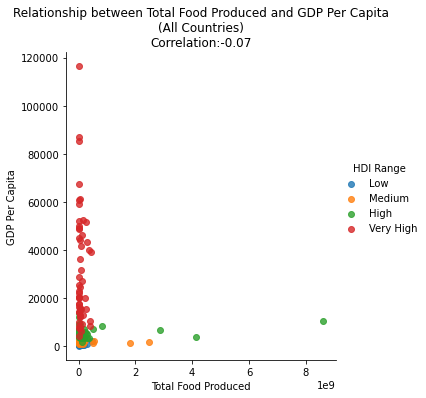

In [173]:
import seaborn as sns
sns.lmplot("Total Food Produced", "GDP Per Capita", data=hdi_range_df, hue="HDI Range", fit_reg=False).set(
    title=f"Relationship between Total Food Produced and GDP Per Capita\n(All Countries)\nCorrelation:{round(st.pearsonr(x_values,y_values)[0],2)}")
plt.savefig("./Question4-Images/food_gdp_hdi_correlation.png")
plt.show()

c:\Users\krist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


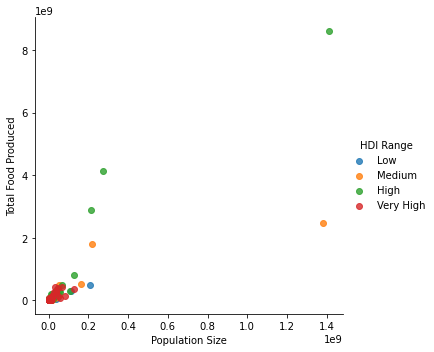

In [127]:
# Population
sns.lmplot("Population Size","Total Food Produced", data=hdi_range_df, hue="HDI Range", fit_reg=False)
plt.show()

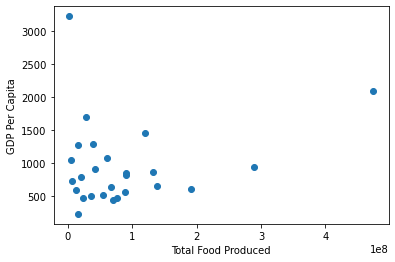

Correlation: 0.19


In [128]:
low_x_values = low_hdi['Total Food Produced']
low_y_values = low_hdi['GDP Per Capita']
plt.scatter(low_x_values,low_y_values)
plt.ylabel("GDP Per Capita")
plt.xlabel("Total Food Produced")
plt.show()
print(f"Correlation: {round(st.pearsonr(low_x_values,low_y_values)[0],2)}")

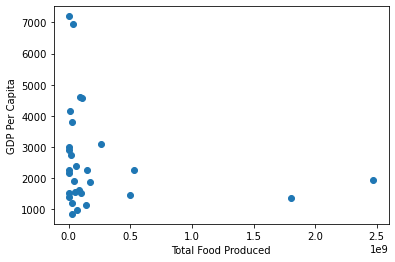

Correlation: -0.19


In [129]:
med_x_values = med_hdi['Total Food Produced']
med_y_values = med_hdi['GDP Per Capita']
plt.scatter(med_x_values,med_y_values)
plt.ylabel("GDP Per Capita")
plt.xlabel("Total Food Produced")
plt.show()
print(f"Correlation: {round(st.pearsonr(med_x_values,med_y_values)[0],2)}")

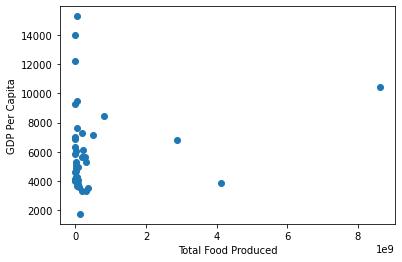

Correlation: 0.17


In [130]:
high_x_values = high_hdi['Total Food Produced']
high_y_values = high_hdi['GDP Per Capita']
plt.scatter(high_x_values,high_y_values)
plt.ylabel("GDP Per Capita")
plt.xlabel("Total Food Produced")
plt.show()
print(f"Correlation: {round(st.pearsonr(high_x_values,high_y_values)[0],2)}")

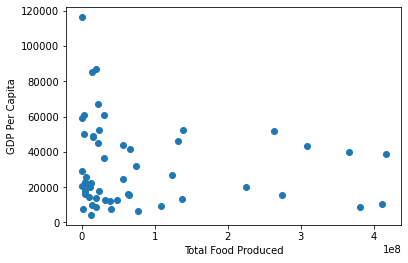

Correlation: -0.11


In [131]:
very_high_x_values = very_high_hdi['Total Food Produced']
very_high_y_values = very_high_hdi['GDP Per Capita']
plt.scatter(very_high_x_values,very_high_y_values)
plt.ylabel("GDP Per Capita")
plt.xlabel("Total Food Produced")
plt.show()
print(f"Correlation: {round(st.pearsonr(very_high_x_values,very_high_y_values)[0],2)}")

In [132]:
# Create a Scatterplot Function
def show_scat(x_values, y_values):
    plt.scatter(x_values,y_values)
    plt.xlabel("GDP Per Capita")
    plt.ylabel("Human Development Index")
    plt.show()
    print(f"Correlation: {round(st.pearsonr(x_values,y_values)[0],2)}")

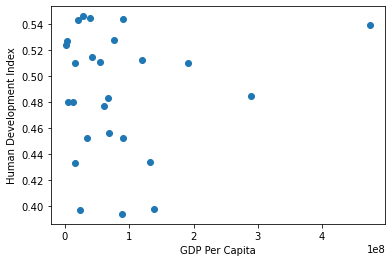

Correlation: 0.07


In [133]:
show_scat(low_hdi['Total Food Produced'], low_hdi["HDI"])